In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



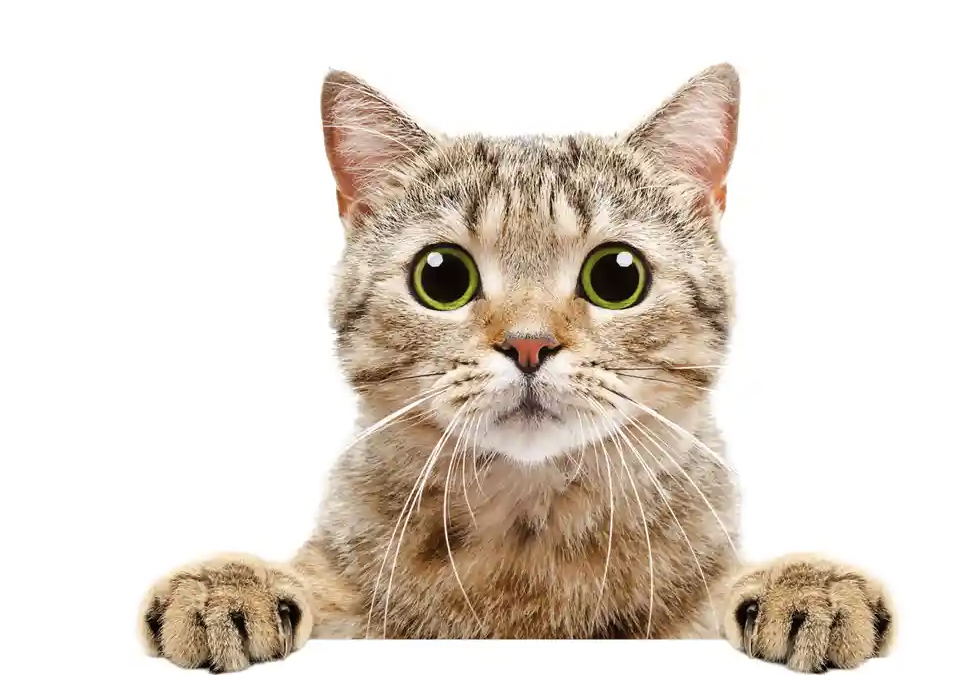

In [30]:
img1 = cv2.imread(cv2.samples.findFile("./resources/cat.png"), cv2.COLOR_BGR2RGB)
img2 = cv2.imread(cv2.samples.findFile("./resources/geetestplan.jpeg"), cv2.IMREAD_GRAYSCALE)

#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "./resources/cat.png", width = 600, height = 300)


In [47]:
# load and show an image with Pillow
from PIL import Image
from numpy import asarray
# Open the image form working directory
image = Image.open("./resources/geetestObj1.png") #.convert('L')
# convert image to numpy array
data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)

# create Pillow image
image2 = Image.fromarray(data)
print(type(image2))

# summarize image details
print(image2.mode)
print(image2.size)
for x in data:
    print(x)
# create Pillow image
image2 = Image.fromarray(data)
# show the image
image2.show()

#im = np.array(Image.open('kolala.jpeg').convert('L'))

<class 'numpy.ndarray'>
(48, 48, 4)
<class 'PIL.Image.Image'>
RGBA
(48, 48)
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]

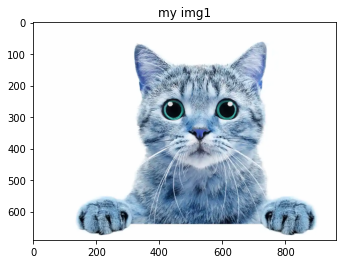

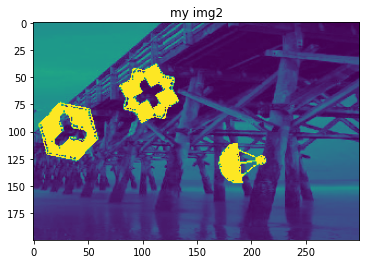

In [31]:

# Threshold both images first before using cv2.findContours

#ret, img1 = cv2.threshold(img1, 200, 255, 0)
#ret, img2 = cv2.threshold(img2, 200, 255, 0)
#img1 = np.invert(img1)

plt.imshow(img1)
plt.title('my img1')
plt.show()

plt.imshow(img2)
plt.title('my img2')
plt.show()


Found matches size:  200
image_match type <class 'numpy.ndarray'>


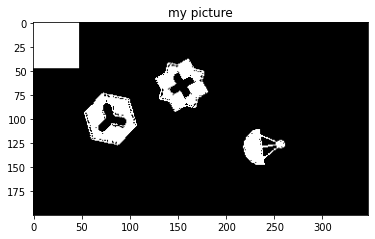

In [11]:

if img1 is None or img2 is None:
    print('Could not open or find the images!')
    exit(0)
#-- Step 1: Detect the keypoints using SURF Detector, compute the descriptors
minHessian = 400
detector = cv2.SIFT_create(edgeThreshold=10)
keypoints1, descriptors1 = detector.detectAndCompute(img1, None)
keypoints2, descriptors2 = detector.detectAndCompute(img2, None)
#-- Step 2: Matching descriptor vectors with a FLANN based matcher
# Since SURF is a floating-point descriptor NORM_L2 is used
matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
knn_matches = matcher.knnMatch(descriptors1, descriptors2, 2)
#-- Filter matches using the Lowe's ratio test
ratio_thresh = 0.8
good_matches = []
for m,n in knn_matches:
    if m.distance < ratio_thresh * n.distance:
        good_matches.append(m)
#-- Draw matches
img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, img_matches, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#-- Show detected matches
print("Found matches size: ", len(img_matches))
print("image_match type", type(img_matches[0]))

plt.imshow(img_matches)
plt.title('my picture')
plt.show()